# Methods for testing and plotting the functios in Potapov.py

In [1]:
import Potapov as P
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def plot(L,dx,func,(i,j),*args):
    '''
    This function plots func(F(z)) for z*1j from -L to L for each function 
    F in args.
    '''
    x = np.linspace(-L,L,2.*L/dx)
    for arg in args:
        plt.plot(x,[func(arg(x_el*1j)[i,j]) for x_el in x ])
    return

In [3]:
def make_plots(T1,T2):
    '''
    This function plots the absolute value T1 and T2 from -20 to 20 along 
    the components [0,1].
    The purpose of this function is to compare the T1 and T2 functions.
    '''
    plt.figure(1)
    plt.subplot(211)
    plot(20,0.1,abs,[0,1],T1 )

    plt.subplot(212)
    plot(20,0.1,abs,[0,1],T2 )
    plt.show()
    return

In [4]:
def test(vals,vecs):
    '''
    Generate a rational transfer function based on some eigenvalues and 
    eigenvectors by generating a Blaschke-Potapov product. Test the 
    zero-pole interpolation method by finding the resides along the poles,
    computing the eigenvalues and eigenvectors, and reconstructing the 
    Blaschke-Potapov product.
    '''
    T = P.finite_transfer_function(np.eye(2),vecs,vals)
    T_test = P.get_Potapov(T,vals)
    make_plots(T,T_test)
    return

## Tests
In each of these tests, we construct a Blaschke-Potapov product. We apply our procedure on the resulting function and reconstruct the product.

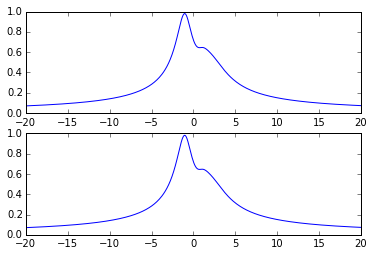

In [5]:
vals = [1-1j,-1+1j, 2+2j]
vecs = [ P.normalize(np.matrix([-5.,4j])).T, P.normalize(np.matrix([1j,3.]).T),
        P.normalize(np.matrix([2j,7.]).T)]
test(vals,vecs)

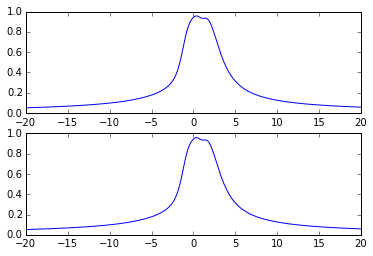

In [6]:
vals = [ -2+1j,1-1j,-1+1j,2+2j,]
vecs = [ P.normalize(np.matrix([-5.,4j])).T, P.normalize(np.matrix([1j,3.]).T),\
    P.normalize(np.matrix([-2.,4j]).T),P.normalize(np.matrix([2j,7.]).T), ]
test(vals,vecs)

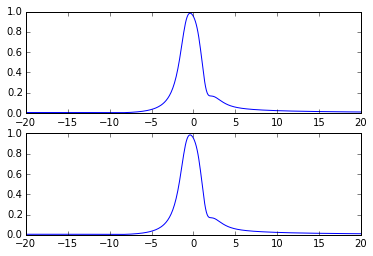

In [7]:
vals = [1-1j,-1+1j, 2+2j,-2+1j]
vecs = [ P.normalize(np.matrix([-5.,4j])).T, P.normalize(np.matrix([1j,3.]).T),\
    P.normalize(np.matrix([2j,7.]).T), P.normalize(np.matrix([-2.,4j]).T)]
test(vals,vecs)

## Testing the code to generate an ABCD model.

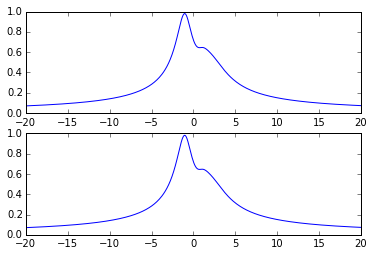

In [8]:
vals = [1-1j,-1+1j, 2+2j]
vecs = [ P.normalize(np.matrix([-5.,4j])).T, P.normalize(np.matrix([1j,3.]).T),
        P.normalize(np.matrix([2j,7.]).T)]
[A,B,C,D] = P.get_Potapov_ABCD(vals,vecs)
M = A.shape[0]
T = P.finite_transfer_function(np.eye(2),vecs,vals)
T_ABCD = lambda z: D+C*la.inv(z*np.eye(M) - A)*B
make_plots(T,T_ABCD)